''' The Australian weather dataset is a collection of meteorological data captured across various regions in Australia. It typically includes information such as temperature, humidity, wind speed, rainfall, atmospheric pressure, and other relevant weather parameters recorded at regular intervals, often on a daily basis. This dataset is valuable for climate research, weather prediction models, and various applications in agriculture, urban planning, and disaster management. It enables analysts and researchers to study weather patterns, trends, and anomalies over time, aiding in understanding the dynamics of Australia's climate and its impact on the environment and society.

we predict the rain tommorrow using Logistic regression model. '''

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.metrics import mean_squared_error


### Read the CSV File

In [3]:
df = pd.read_csv('/kaggle/input/weatheraus/weatherAUS.csv')
#printing the first five rows of the dataset
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


## Data Inspection

In [4]:
#number of rows and columns in the dataset
df.shape

(142193, 24)

In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [6]:
#finding the datatypes of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [7]:
# finding the missing values in each column
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [8]:
# Dropping the columns that are having more missing values
df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm','RISK_MM'],axis=1,inplace=True)

In [9]:
df.shape

(142193, 19)

In [10]:
# converting Date column into standard datetime format
df['Date']=pd.to_datetime(df['Date'])



#it extract year,month,day number in the datetime column
df['Year']=df['Date'].dt.year 
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

#Dropping the date column
df.drop('Date',axis=1,inplace=True)

In [11]:
df.shape


(142193, 21)

In [12]:
df['RainToday'].dtype

dtype('O')

In [13]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'Year', 'Month', 'Day'],
      dtype='object')

In [15]:
#Making a list of categorical columns
categorical_features=[]
for i in df.columns:
    if df[i].dtype=='O':
        categorical_features.append(i)

In [16]:
categorical_features

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [18]:
#Finding the missing values in categorical columns
df[categorical_features].isnull().sum()

Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

## Imputation

In [19]:
df['WindGustDir'].mode()

0    W
Name: WindGustDir, dtype: object

In [21]:
df['WindDir9am'].mode()

0    N
Name: WindDir9am, dtype: object

In [22]:
df['WindDir3pm'].mode()

0    SE
Name: WindDir3pm, dtype: object

In [23]:
df['RainToday'].mode()

0    No
Name: RainToday, dtype: object

In [25]:
df['WindGustDir']=df['WindGustDir'].fillna('W')
df['WindDir9am']=df['WindDir9am'].fillna('N')
df['WindDir3pm']=df['WindDir3pm'].fillna('SE')
df['RainToday']=df['RainToday'].fillna('No')
df[categorical_features].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [26]:
#Making a list of continuous columns
numerical_features=[]
for i in df.columns:
    if df[i].dtype!='O':
        numerical_features.append(i)
        
numerical_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [27]:
# Finding the missing values in continuous columns
df[numerical_features].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

In [28]:
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())

df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())

df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [29]:
df[numerical_features].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [31]:
for col in categorical_features:
    print(df[col].value_counts())
    print("""""""""""""")

Location
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek   

In [32]:
for col in categorical_features:
    print(col)
    print(df[col].nunique())
    print('==================')

Location
49
WindGustDir
16
WindDir9am
16
WindDir3pm
16
RainToday
2
RainTomorrow
2


In [34]:
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['RainToday'] = le.fit_transform(df['RainToday'])


In [35]:
# seprating the features and target variable
X=df.drop(['RainTomorrow'],axis=1)
y=df['RainTomorrow']
X.shape

(142193, 20)

In [36]:
#Splitting the dataset into traing and testing dataset
X_train=X.iloc[:99536]
X_test=X.iloc[99536:]
y_train=y.iloc[:99536]
y_test=y.iloc[99536:]
y_test

99536      No
99537      No
99538      No
99539     Yes
99540      No
         ... 
142188     No
142189     No
142190     No
142191     No
142192     No
Name: RainTomorrow, Length: 42657, dtype: object

In [38]:
# transforming using standardscalar which makes mean=0 and std=1 of every column
ss=StandardScaler()

X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [39]:
X_test[1:10]

array([[-0.05026901, -0.95862965, -0.36353243, -0.27916871, -0.01505227,
        -0.63949479,  1.02351795,  0.08252   , -0.74311301,  0.03153188,
        -0.90454389, -0.42381557,  1.56520282,  1.50210119, -0.15289577,
        -0.40794713, -0.54422117,  1.30124868, -0.70190563, -1.4455629 ],
       [-0.05026901, -1.35063903,  0.08840452, -0.27916871, -1.08050757,
        -0.63949479, -1.64900138, -0.35648112, -0.74311301, -0.40695972,
        -0.11109891, -1.07453201,  0.74062289,  0.15126474, -0.35772985,
         0.17944793, -0.54422117,  1.30124868, -0.70190563, -1.33190411],
       [-0.05026901, -0.30005389,  0.11756174, -0.27916871, -0.22814333,
         0.91378342, -0.31274172,  0.96052225,  0.9119188 ,  0.03153188,
        -1.98136207,  1.67849907, -1.2533613 , -0.66834389,  0.22525945,
        -0.79954384, -0.54422117,  1.30124868, -0.70190563, -1.21824532],
       [-0.05026901,  0.01355361, -0.80089076,  0.61434738,  0.83731196,
         1.20964593,  1.24622789,  0.96052225, -

''' solver-used for optimization during the training process, it determines how model learns the optimal parameters that minimizes cost function and maximize the liklihood of the observed data liblinear-suitable for small to medium size datasets,supports both L1 and L2 regularization. '''

In [40]:
# Training the model with training set

log_reg=LogisticRegression(solver='liblinear',random_state=0)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [46]:
#Predicting the target variable using logistic regression model on test dataset

y_pred = log_reg.predict(X_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [47]:
# Parameters of the model

log_reg.coef_

array([[-0.0995991 ,  0.31204641, -0.16872686,  0.08881142,  0.04322068,
         0.71637887, -0.08385089,  0.0280372 , -0.0610044 , -0.2548805 ,
         0.0203454 ,  1.24516443,  0.76483218, -1.09708115, -0.22773095,
         0.16503095,  0.21908122, -0.01406541,  0.02240345, -0.01701802]])

In [48]:
log_reg.intercept_

array([-1.66362841])

In [49]:
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred,pos_label='Yes')
'''
 specifies which class label should be considered as the positive class
 when computing precision. In this case,
 'Yes' is considered as the positive class, and precision will be computed 
 for the class labeled 'Yes'
'''

precision=precision_score(y_test,y_pred,pos_label='Yes')
conf_matrix=confusion_matrix(y_test,y_pred)
classification_report_str=classification_report(y_test,y_pred)

## Metrics of the Classification model


In [50]:
print('Accuracy:',accuracy)
print('precision:',precision)
print('Recall:',recall)
print('Confusion Matrix:\n',conf_matrix)
print('classification_report:\n',classification_report_str)

Accuracy: 0.8530839018215064
precision: 0.7479484173505275
Recall: 0.4347529812606474
Confusion Matrix:
 [[32562  1290]
 [ 4977  3828]]
classification_report:
               precision    recall  f1-score   support

          No       0.87      0.96      0.91     33852
         Yes       0.75      0.43      0.55      8805

    accuracy                           0.85     42657
   macro avg       0.81      0.70      0.73     42657
weighted avg       0.84      0.85      0.84     42657



In [51]:
# Using the trained logistic regression model 'log_reg' to predict probabilities of the first 10 samples
log_reg_pred_prob=log_reg.predict_proba(X_test)[0:10]
log_reg_pred_prob

array([[0.98180513, 0.01819487],
       [0.97299329, 0.02700671],
       [0.96465166, 0.03534834],
       [0.41437723, 0.58562277],
       [0.80548479, 0.19451521],
       [0.90563604, 0.09436396],
       [0.79429636, 0.20570364],
       [0.61260068, 0.38739932],
       [0.82128082, 0.17871918],
       [0.77107527, 0.22892473]])

## C=100

''' C-Regularization Parameter It is a technique use to prevent Overfitting by adding a penalty term to model's cost function '''

In [52]:
log_reg100=LogisticRegression(C=100,solver='liblinear',random_state=0)
log_reg100.fit(X_train,y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [53]:
y_pred=log_reg100.predict(X_test)

In [355]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,pos_label='Yes')
recall=recall_score(y_test,y_pred,pos_label='Yes')
conf_matrix=confusion_matrix(y_test,y_pred)
classification_report_str=classification_report(y_test,y_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100, random_state=0, solver='liblinear')

In [54]:
print('Accuracy:',accuracy)
print('precision:',precision)
print('Recall:',recall)
print('Confusion Matrix:\n',conf_matrix)
print('classification_report:\n',classification_report_str)

Accuracy: 0.8530839018215064
precision: 0.7479484173505275
Recall: 0.4347529812606474
Confusion Matrix:
 [[32562  1290]
 [ 4977  3828]]
classification_report:
               precision    recall  f1-score   support

          No       0.87      0.96      0.91     33852
         Yes       0.75      0.43      0.55      8805

    accuracy                           0.85     42657
   macro avg       0.81      0.70      0.73     42657
weighted avg       0.84      0.85      0.84     42657



## C=0.01

In [55]:
log_reg01=LogisticRegression(C=0.01,solver='liblinear',random_state=0)
log_reg01.fit(X_test,y_test)
y_pred01=log_reg01.predict(X_test)

In [56]:
#the probabilities of the first 10 samples
y_pred_prob01=log_reg01.predict_proba(X_test)
y_pred_prob01[0:10]

array([[0.97381237, 0.02618763],
       [0.97654931, 0.02345069],
       [0.96472229, 0.03527771],
       [0.4182379 , 0.5817621 ],
       [0.74324174, 0.25675826],
       [0.90231592, 0.09768408],
       [0.81569129, 0.18430871],
       [0.6155915 , 0.3844085 ],
       [0.79504288, 0.20495712],
       [0.79042565, 0.20957435]])

In [57]:
# Creating a dataframe with probabilities of the first 10 samples
y_pred_prob01_df=pd.DataFrame(data=y_pred_prob01,columns=['Prob of -NO rain tommorrow(0)','Prob of -rain tommorrow(1)'])
y_pred_prob01_df

,Prob of -NO rain tommorrow(0),Prob of -rain tommorrow(1)
0,0.973812,0.026188
1,0.976549,0.023451
2,0.964722,0.035278
3,0.418238,0.581762
4,0.743242,0.256758
...,...,...
42652,0.983427,0.016573
42653,0.986849,0.013151
42654,0.991538,0.008462
42655,0.974667,0.025333


In [58]:
y_pred_01=y_pred_prob01[:,1]
y_pred_01

array([0.02618763, 0.02345069, 0.03527771, ..., 0.00846217, 0.02533324,
       0.0164666 ])

(0.0, 1.0)

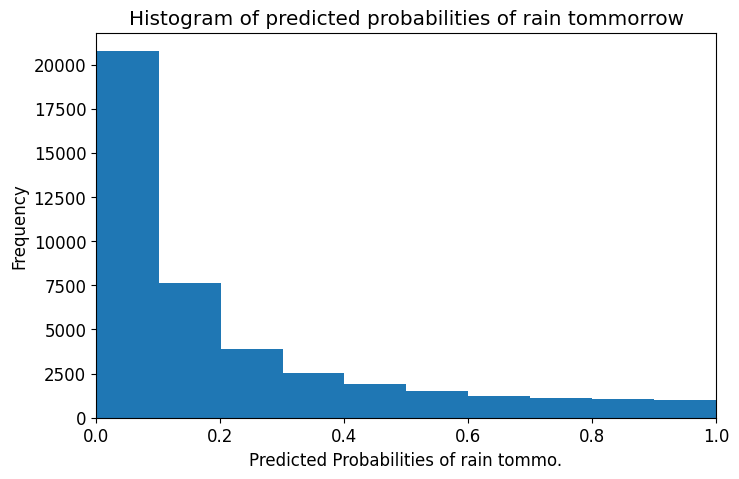

In [61]:
#plot histogram 0f prdicted probabalities

plt.rcParams['figure.figsize']=[8,5]
plt.rcParams['font.size']=12
plt.hist(y_pred_01,bins=10)

plt.title('Histogram of predicted probabilities of rain tommorrow')
plt.xlabel('Predicted Probabilities of rain tommo.')
plt.ylabel('Frequency')

plt.xlim(0,1)

plt.xlim(0,1)


''' In the below code, different thresholds are taken, values greater than threshold is set to 1 and values lessthan and equal to is set to 0.

and finding metrics of classification for different thresholds.

'''

In [62]:
#Lower the Threshold

from sklearn.preprocessing import binarize

for i in range(1,5):
    cm1=0
    y_pred=log_reg.predict_proba(X_test)[:,1]
    print(y_pred.shape)
    y_pred1=y_pred.reshape(-1,1)
    print(y_pred1.shape)
    y_pred2=binarize(y_pred1,threshold=i/10)
    y_pred2=np.where(y_pred2==1,'Yes','No')
    cm1=confusion_matrix(y_test,y_pred2)
    
    print('with', i/10, 'threshold the confusion Matrix is', '\n\n', cm1, '\n\n',
           'with', cm1[0,0]+cm1[1,1], 'correct predictions,','\n\n',
            cm1[0,1], 'TYpe I errors(False Positives),','\n\n',
            cm1[1,0], 'Type II errors(False Negative),', '\n\n',
            'Accuracy score', (accuracy_score(y_test,y_pred2)),'\n\n',
            'sensitivity', cm1[1,1]/(float(cm1[1,1]+cm1[1,0])),'\n\n',
            'Specificity', cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n'
            '''''''''''''''''''''''''''''''''''''''''''''''' '\n\n'
          
         )

(42657,)
(42657, 1)
with 0.1 threshold the confusion Matrix is 

 [[20017 13835]
 [  835  7970]] 

 with 27987 correct predictions, 

 13835 TYpe I errors(False Positives), 

 835 Type II errors(False Negative), 

 Accuracy score 0.6560939587875378 

 sensitivity 0.9051675184554231 

 Specificity 0.5913092284060026 




(42657,)
(42657, 1)
with 0.2 threshold the confusion Matrix is 

 [[27202  6650]
 [ 1994  6811]] 

 with 34013 correct predictions, 

 6650 TYpe I errors(False Positives), 

 1994 Type II errors(False Negative), 

 Accuracy score 0.7973603394519071 

 sensitivity 0.7735377626348665 

 Specificity 0.803556658395368 




(42657,)
(42657, 1)
with 0.3 threshold the confusion Matrix is 

 [[30150  3702]
 [ 3108  5697]] 

 with 35847 correct predictions, 

 3702 TYpe I errors(False Positives), 

 3108 Type II errors(False Negative), 

 Accuracy score 0.8403544553062803 

 sensitivity 0.6470187393526405 

 Specificity 0.890641616448068 




(42657,)
(42657, 1)
with 0.4 thresho

''' Area under receiver operating characteristics curve(AOC-RUC) gives graphical representation of the performance of the binary classification at various classification thresholds. '''

Text(0, 0.5, 'True Positive Rate')

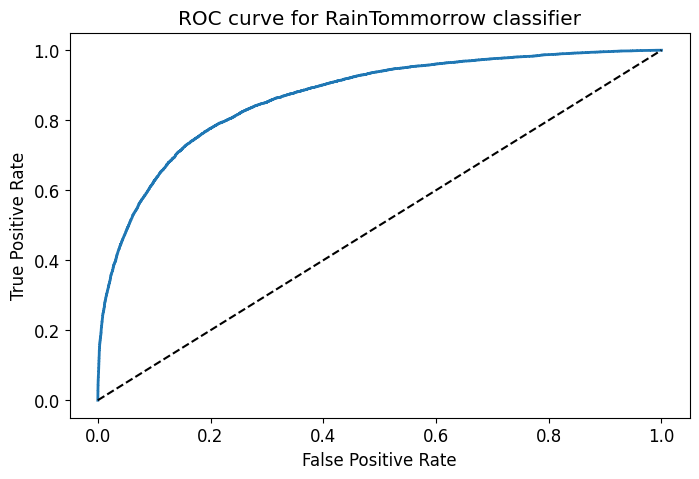

In [63]:
#plot ROC Curve

from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(y_test,y_pred1,pos_label='Yes')
plt.plot(fpr,tpr,linewidth=2)

plt.plot([0,1],[0,1],'k--')
plt.title('ROC curve for RainTommorrow classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [64]:
len(thresholds)

9048

In [65]:
from sklearn.metrics import roc_auc_score

ROC_AUC= roc_auc_score(y_test,y_pred1)

print('ROC AUC :{:,.4f}'.format(ROC_AUC))

ROC AUC :0.8673


''' k-fold cross validation model trained on (k-1) folds validated on remaining fold, this process repeats k-times with each fold used exactly once as the validation set '''

In [66]:
#Calculating cross-validated ROC AUC

from sklearn.model_selection import cross_val_score

C_V_S_ROC_AUC=cross_val_score(log_reg,X,y,cv=10,scoring='roc_auc').mean()

print('Cross validated ROC AUC :{:.4f}'.format(C_V_S_ROC_AUC))

Cross validated ROC AUC :0.8502


In [67]:
#Applying 5_fold cross validation

from sklearn.model_selection import cross_val_score

scores=cross_val_score(log_reg,X,y,cv=5,scoring='accuracy')
print('Cross_validation_scores:{}'.format(scores))

Cross_validation_scores:[0.83364394 0.81409332 0.84524772 0.84348407 0.84661369]


In [68]:
print('Average cross-validation scores:{}'.format(scores.mean()))

Average cross-validation scores:0.836616548386065


''' GridSearchCV is a technique used for hyperparameter tuning in machine learning. It systematically searches through a specified grid of hyperparameters, evaluating the model's performance using cross-validation. This method helps in finding the optimal combination of hyperparameters that yields the best performance for the model. '''

In [69]:
#hyperparameter tuning

from sklearn.model_selection import GridSearchCV

parameters=[{'penalty':['l1','l2']},
            {'C':[1,10,100,1000]}]

grid_search=GridSearchCV(estimator=log_reg,
                         param_grid=parameters,
                         scoring='accuracy',
                          cv=5,
                          verbose=0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [70]:
#Examine the best model

#best score achieved during the GridsearchCV
print('GridSearch CV best score:{:.4f}\n\n'.format(grid_search.best_score_))

#print parameters that give the best results
print('Parameters that give the best results:{}\n\n '.format(grid_search.best_params_))
#print('Best inverse regularization strength value:{}\n\n'.format(grid_search.best_params_['C']))

#print estimator that was choosen by the GridSearch
print('Estimator that was chosen by the search\n\n{} '.format(grid_search.best_estimator_))

GridSearch CV best score:0.8291


Parameters that give the best results:{'penalty': 'l1'}

 
Estimator that was chosen by the search

LogisticRegression(penalty='l1', random_state=0, solver='liblinear') 


In [71]:
#calculate GridSearch  CV score on the test set

print('GridSearch CV score on test set:{:.4f}'.format(grid_search.score(X_test,y_test)))

GridSearch CV score on test set:0.8531
